In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [33]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

In [34]:
data  = pd.read_csv('Admission_Predict.csv')
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [35]:
data.drop('Serial No.',axis = 1,inplace = True)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [36]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [38]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [39]:
uni_data = data.groupby(by = 'University Rating').mean()
uni_data

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a600d4890>,
      dtype=object)

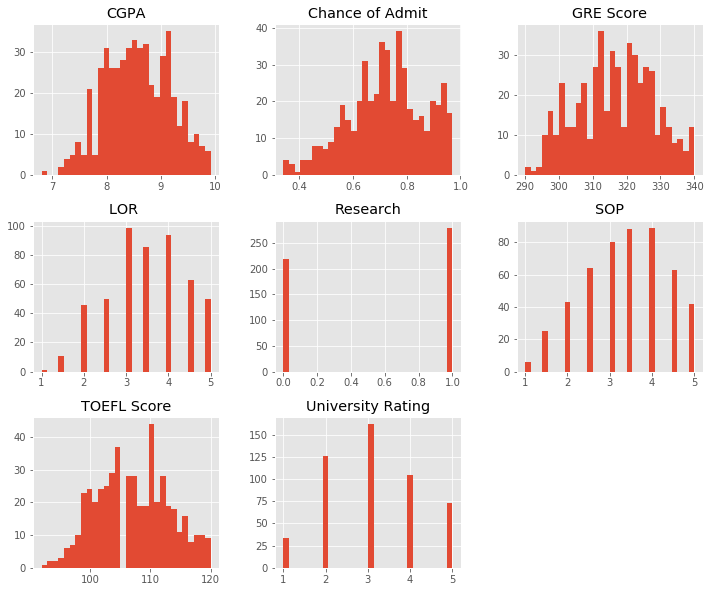

In [40]:
data.hist(bins = 30)

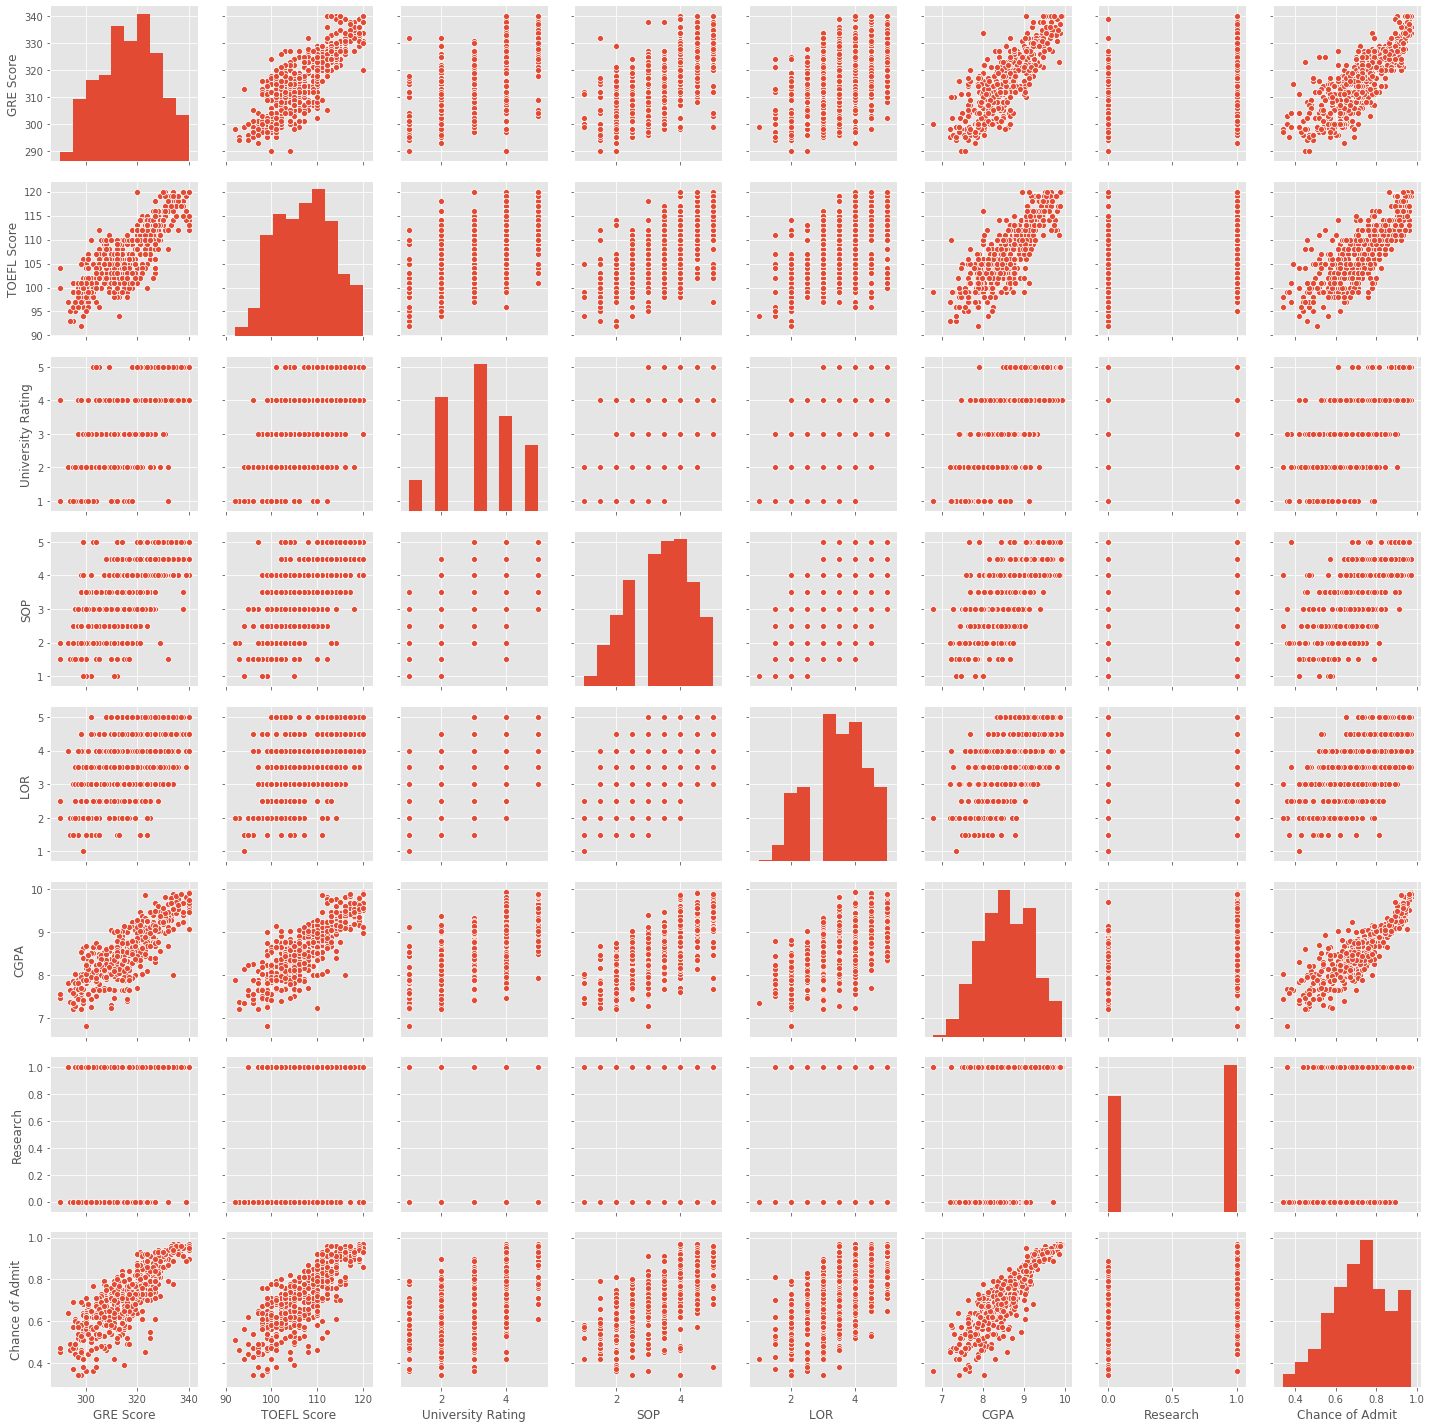

In [41]:
sns.pairplot(data = data)
plt.show()

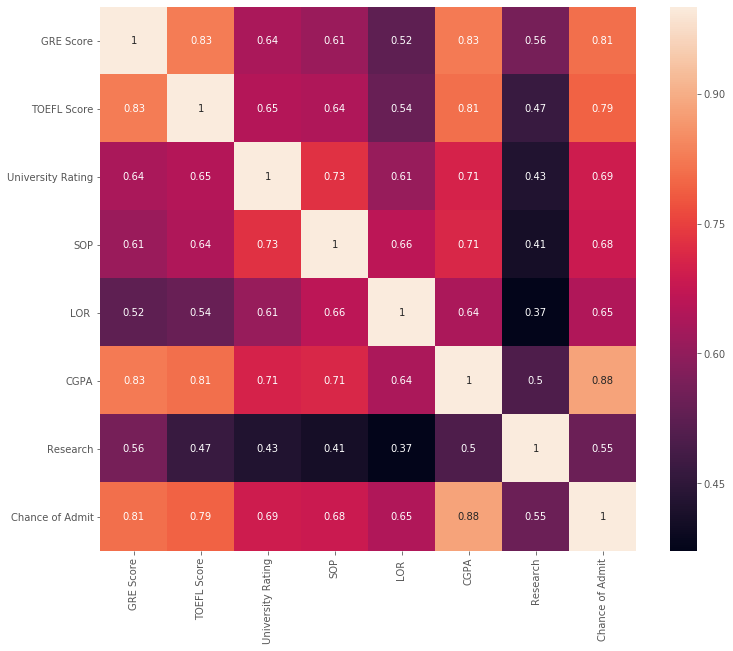

In [42]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [43]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA']
for column in columns:
    data[column] = (data[column]-data[column].mean())/(data[column].std())
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.817417,1.777086,0.774806,1.136222,1.097845,1.775029,1,0.92
1,0.666481,-0.031569,0.774806,0.631683,1.097845,0.485373,1,0.76
2,-0.041788,-0.524839,-0.099693,-0.377395,0.017289,-0.953088,1,0.72
3,0.489414,0.461700,-0.099693,0.127144,-1.063267,0.154692,1,0.80
4,-0.218855,-0.689262,-0.974192,-1.386473,-0.522989,-0.605873,0,0.65
...,...,...,...,...,...,...,...,...
495,1.374750,0.132854,1.649305,1.136222,0.557567,0.733384,1,0.87
496,1.817417,1.612663,1.649305,1.640761,1.638123,2.138777,1,0.96
497,1.197682,2.105932,1.649305,1.136222,1.638123,1.626222,1,0.93
498,-0.395922,-0.689262,0.774806,0.631683,1.638123,-0.242125,0,0.73


In [44]:
columns.append('Research')
X = np.array(data[columns])
Y = np.array(data['Chance of Admit'])

In [45]:
Y = Y.reshape(-1,1)
Y.shape

(500, 1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.06899827500430843

In [49]:
accuracy = model.score(X_test,y_test)
accuracy

0.7506246766852966

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [51]:
ANN_Model  = keras.Sequential()
ANN_Model.add(Dense(50,input_dim = X.shape[1]))
ANN_Model.add(Activation('relu'))

ANN_Model.add(Dense(150))
ANN_Model.add(Activation('relu'))
ANN_Model.add(Dropout(0.5))

ANN_Model.add(Dense(150))
ANN_Model.add(Activation('relu'))
ANN_Model.add(Dropout(0.5))

ANN_Model.add(Dense(50))
ANN_Model.add(Activation('relu'))

ANN_Model.add(Dense(1))

In [52]:
ANN_Model.compile(loss = 'mse',optimizer = 'adam')
ANN_Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_9 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_10 (Activation)   (None, 150)              

In [53]:
epochs_hist = ANN_Model.fit(X_train,y_train,epochs = 100,batch_size = 20)

Epoch 1/100
400/400 [==============================] - 0s 1ms/sample - loss: 0.1609
Epoch 2/100
400/400 [==============================] - 0s 167us/sample - loss: 0.0752
Epoch 3/100
400/400 [==============================] - 0s 191us/sample - loss: 0.0582
Epoch 4/100
400/400 [==============================] - 0s 177us/sample - loss: 0.0392
Epoch 5/100
400/400 [==============================] - 0s 161us/sample - loss: 0.0330
Epoch 6/100
400/400 [==============================] - 0s 151us/sample - loss: 0.0288
Epoch 7/100
400/400 [==============================] - 0s 149us/sample - loss: 0.0266
Epoch 8/100
400/400 [==============================] - 0s 169us/sample - loss: 0.0221
Epoch 9/100
400/400 [==============================] - 0s 151us/sample - loss: 0.0188
Epoch 10/100
400/400 [==============================] - 0s 160us/sample - loss: 0.0163
Epoch 11/100
400/400 [==============================] - 0s 170us/sample - loss: 0.0141
Epoch 12/100
400/400 [==============================] 

400/400 [==============================] - 0s 202us/sample - loss: 0.0035
Epoch 95/100
400/400 [==============================] - 0s 154us/sample - loss: 0.0032
Epoch 96/100
400/400 [==============================] - 0s 162us/sample - loss: 0.0034
Epoch 97/100
400/400 [==============================] - 0s 189us/sample - loss: 0.0035
Epoch 98/100
400/400 [==============================] - 0s 165us/sample - loss: 0.0031
Epoch 99/100
400/400 [==============================] - 0s 153us/sample - loss: 0.0031
Epoch 100/100
400/400 [==============================] - 0s 163us/sample - loss: 0.0030


In [54]:
result = ANN_Model.evaluate(X_test,y_test)
accuracy = 1 - result
print('Accuracy = ',accuracy)

100/100 [==============================] - 0s 1ms/sample - loss: 0.0053
Accuracy =  0.9946583569794893


In [55]:
epochs_hist.history.keys()

dict_keys(['loss'])

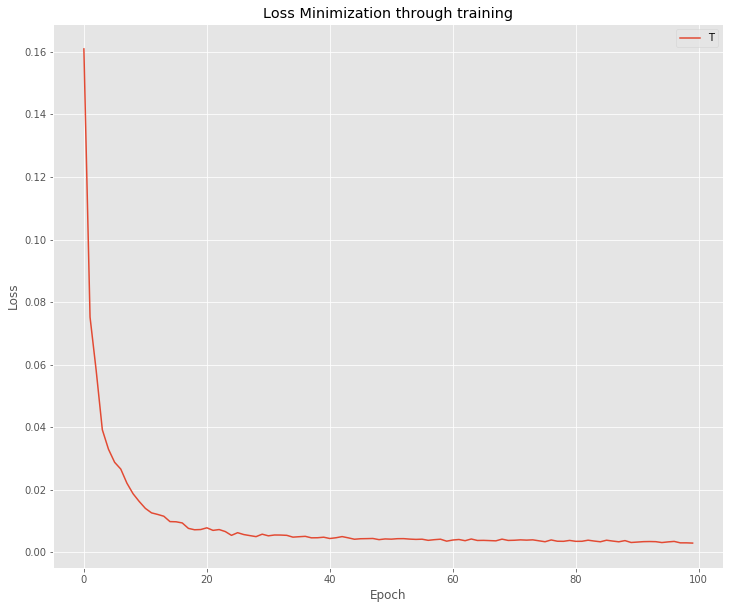

In [56]:
plt.plot(epochs_hist.history['loss'])
plt.title('Loss Minimization through training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend('Training Loss')

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [60]:
accuracy = dtr.score(X_test,y_test)
accuracy

0.5734059688592643

In [64]:
rfr = RandomForestRegressor(max_depth = 10)
rfr.fit(X_train,y_train)

/home/lord_shashwat/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
accuracy = rfr.score(X_test,y_test)
accuracy

0.7203672187371832

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

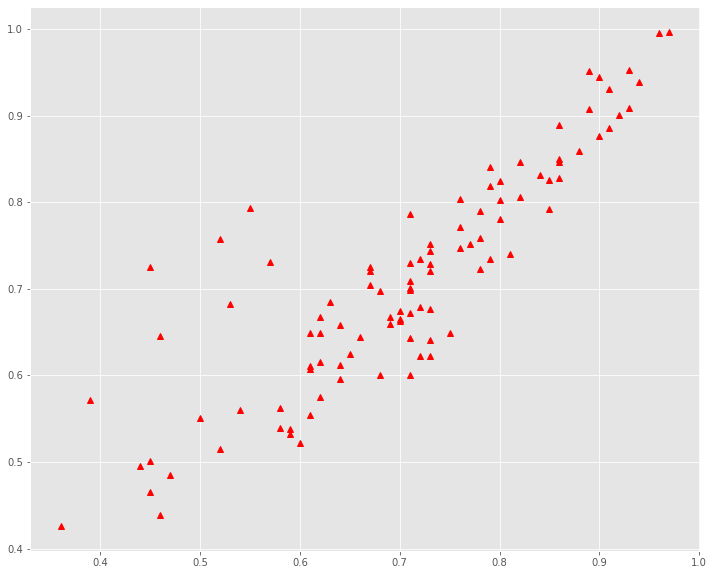

In [67]:
y_predict = model.predict(X_test)
plt.plot(y_test,y_predict,'^',color = 'r')

In case you've scaled the output/input use inverse transform to scale back to normal